 # SMAI Assignment - 2

 ## Question - `1` : Clustering

 | | |
 |- | -|
 | Course | Statistical Methods in AI |
 | Release Date | `16.02.2023` |
 | Due Date | `24.02.2023` |

 **Part 1:**

 Use the **Fashion-MNIST** dataset for this question.

 **About the dataset:**
 Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

 1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
 > i) elbow method
     >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found.

 > ii) silhoette method
     >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found.

 1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)].


 1c) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

 </br>
 </br>
 </br>
 </br>


 **Part 2:**
 </br>
 In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

 2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


 2b) Implement Hierarchical clustering using: </br>
 > i) single linkage

 > ii) Complete linkage

 Visualize the clusters obtained using these linkages and compare.

 </br>
 </br>
 </br>
 </br>

 **Part 3:**
 </br>
 In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits).

 (an example image has been provided in the folder)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import keras
from sklearn.cluster import KMeans


 ## Part1: K Means

In [34]:
from keras.datasets import fashion_mnist
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()
trainX = np.array(trainX).reshape(trainX.shape[0], -1)
trainY = np.array(trainY).reshape(trainY.shape[0], -1)
testX = np.array(testX).reshape(testX.shape[0], -1)
testY = np.array(testY).reshape(testY.shape[0], -1)

# images are 28x28, 60000 in train, 10000 in test
print(trainX.shape)


(60000, 784)


In [35]:
# k-means clustering

def testKMCluster(x, numClusters, init='k-means++'):
    kmeans = KMeans(n_clusters=numClusters, init=init, n_init=10).fit(x)
    predictedLabels = kmeans.predict(x)
    dists = np.linalg.norm((np.array(kmeans.cluster_centers_)[predictedLabels] - x), axis=-1)
    avgDist = np.sum(dists)/dists.shape[0]

    return avgDist, np.array(kmeans.cluster_centers_)

def runKMExpElbow(x, minK, maxK, init='k-means++'):
    dists = []
    for i in range(minK, maxK+1):
        print("Generating cluster %d...\r" % i)
        dist, _ = testKMCluster(x, i, init)
        dists.append(dist)
    print(dists)
    print(np.arange(minK, maxK+1))
    print(len(dists))

    plt.plot(np.arange(minK, maxK+1), dists)
    plt.xlabel("Number of clusters")
    plt.ylabel("Sum of intra-cluster distances")
    plt.show()

    return dists


Generating cluster 2...
Generating cluster 3...
Generating cluster 4...
Generating cluster 5...
Generating cluster 6...
Generating cluster 7...
Generating cluster 8...
Generating cluster 9...
Generating cluster 10...
Generating cluster 11...
Generating cluster 12...
Generating cluster 13...
Generating cluster 14...
Generating cluster 15...
[1825.4706265095037, 1686.585325281141, 1608.432377741969, 1552.7282257452298, 1496.2468445940417, 1467.9250846976847, 1444.141521351575, 1421.6166397209004, 1400.1669169685608, 1383.221191852738, 1364.586228749174, 1348.7285134431283, 1334.2504110498778, 1324.0556311385344]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
14


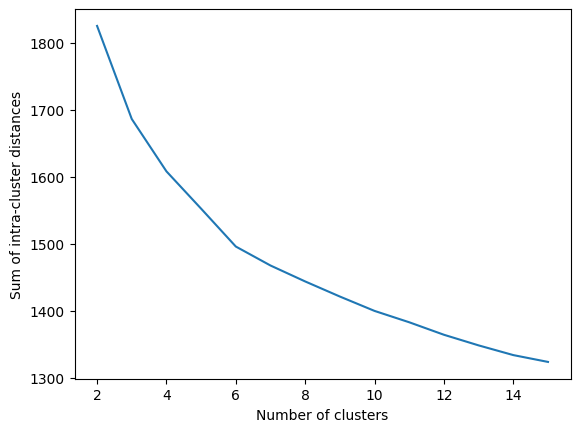

In [36]:
dists = runKMExpElbow(testX, 2, 15)


 The elbow is not clear, but it appears to be at around 7 or 8. This is a common problem when using just a standard elbow method.

In [37]:
from sklearn.metrics import silhouette_score

# silhoutte score
def getSillhouteScore(x, numClusters, init='k-means++'):
    kmeans = KMeans(n_clusters=numClusters, init=init, n_init=10).fit(x)
    s = silhouette_score(x, kmeans.predict(x))
    return s


def runKMExpSillhoute(x, minK, maxK, init='k-means++'):
    sillhoutes = []
    for i in range(minK, maxK+1):
        print("Generating cluster %d...\r" % i)
        sillhoutes.append(getSillhouteScore(x, i, init))
        

    print(sillhoutes)
    print(np.arange(minK, maxK+1))
    print(len(sillhoutes))

    plt.plot(np.arange(minK, maxK+1), sillhoutes)
    plt.xlabel("Number of clusters")
    plt.ylabel("Sum of intra-cluster distances")
    plt.show()

    return sillhoutes


Generating cluster 2...
Generating cluster 3...
Generating cluster 4...
Generating cluster 5...
Generating cluster 6...
Generating cluster 7...
Generating cluster 8...
Generating cluster 9...
Generating cluster 10...
Generating cluster 11...
Generating cluster 12...
Generating cluster 13...
Generating cluster 14...
Generating cluster 15...
[0.1945596226397124, 0.18743456051146917, 0.17823270121278448, 0.161247418377728, 0.1556561350827571, 0.16411367741316776, 0.16283475095840635, 0.15085289488006462, 0.15596872550805987, 0.14326687800653196, 0.13977716991333494, 0.1327189794587427, 0.1332957612947385, 0.12675508233632068]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
14


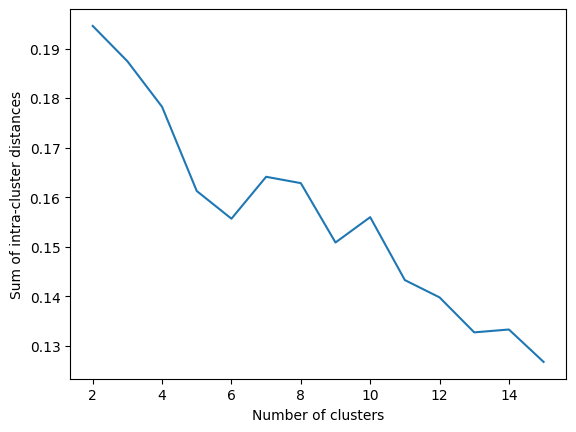

In [38]:
sillhoutes = runKMExpSillhoute(testX, 2, 15)


 There is a peak at 7 clusters, which is in line with the elbow method results. However, using sklearns sillhoute metric does not give accurate results. K means at a pixel level is not the optimal method to measure image similarity. A shirt and a pair of trousers may have a large patch of overlapping white pixels, which skews the distance into being lesser than it ideally should. This could lead to a large variety of iamges being clustered very close together.

Generating cluster 2...
Generating cluster 3...
Generating cluster 4...
Generating cluster 5...
Generating cluster 6...
Generating cluster 7...
Generating cluster 8...
Generating cluster 9...
Generating cluster 10...
Generating cluster 11...
Generating cluster 12...
Generating cluster 13...
Generating cluster 14...
Generating cluster 15...
[1825.4706265095037, 1686.7894979876123, 1608.4323156883586, 1552.7304470491733, 1496.230159493437, 1467.8830562885214, 1443.4112176436358, 1421.3710967161658, 1400.4630433467526, 1383.5735932078178, 1364.799036639966, 1348.5697410611763, 1334.2180927724942, 1325.003338856651]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
14


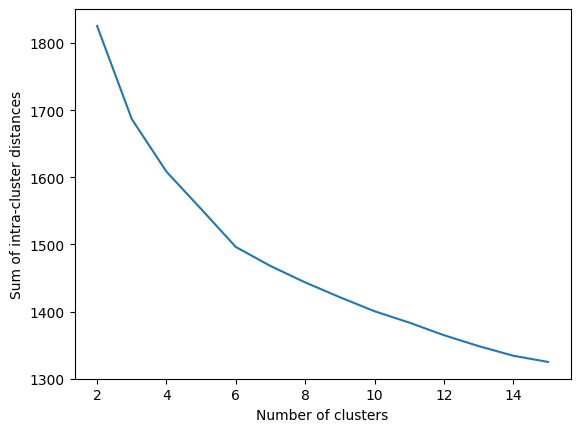

Generating cluster 2...
Generating cluster 3...
Generating cluster 4...
Generating cluster 5...
Generating cluster 6...
Generating cluster 7...
Generating cluster 8...
Generating cluster 9...
Generating cluster 10...
Generating cluster 11...
Generating cluster 12...
Generating cluster 13...
Generating cluster 14...
Generating cluster 15...
[0.19457321898836213, 0.18820645864203242, 0.17823270121278448, 0.1612521269442455, 0.15563828672376517, 0.16410977389458745, 0.1628091266989607, 0.15658054723782233, 0.15663293155731683, 0.14359127569758892, 0.1398795724619289, 0.13676207335557578, 0.13385608858612041, 0.12887409744404976]
[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15]
14


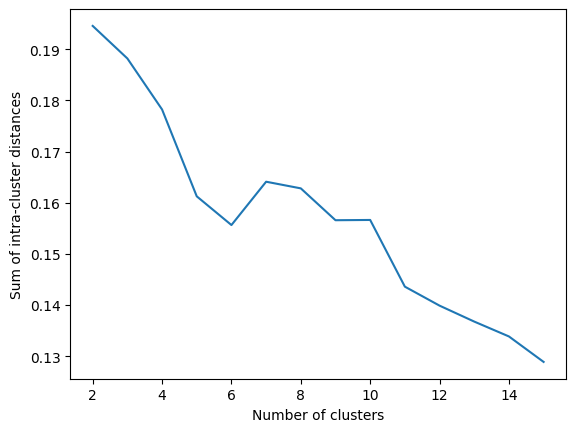

In [39]:
%matplotlib inline
# running with random inits
dists = runKMExpElbow(testX, 2, 15, 'random')
sillhoutes = runKMExpSillhoute(testX, 2, 15, 'random')


In [47]:
# visualise the clusters

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# reduce dimensionality to reduce computing time
pca = PCA(n_components=70)
reducedX = pca.fit_transform(testX)

Y = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(reducedX)
print(Y)

[[ -37.063087   49.830376]
 [  19.855276  -61.858295]
 [  -9.237671 -105.48181 ]
 ...
 [ -40.067165  -58.585354]
 [  21.720722  -74.441025]
 [ -42.488823   36.22114 ]]


[[-48.94519    29.093529 ]
 [ -2.3905447 -63.58712  ]
 [ 48.765194   46.33571  ]
 ...
 [  0.3613005  11.864383 ]
 [ 29.902689   49.92667  ]
 [-26.380253   36.389416 ]]


[]

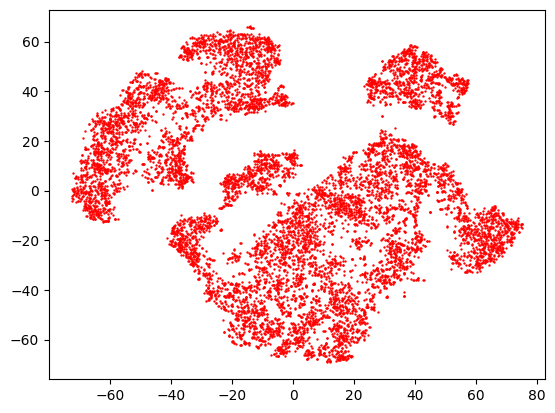

In [50]:
Y = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=50).fit_transform(reducedX)
print(Y)

plt.scatter(Y[:,0], Y[:,1], c="r", s=0.5)
plt.axis("tight")
plt.plot()

 # Q2 Hierarchical clustering

In [77]:
# implement hierarchical clustering (you can use scikit module)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# use skl.cluster to fit x, return the model
def hierarchical_clustering(x, linkage='single'):
    # aClustering = AgglomerativeClustering(distance_threshold=None, n_clusters=max((len(x)), 200), linkage='single')
    aClustering = AgglomerativeClustering(distance_threshold=None, n_clusters=max(100, len(x)), compute_distances=True, linkage=linkage)
    aClustering = aClustering.fit(x)

    return aClustering

# sch.dendrogram needs a linkage matrix in the format of y in sch.linkage
def dendrogram(model):
    sys.setrecursionlimit(100000)

    # make an array to store the number of nodes for each child
    counts = np.zeros(model.children_.shape[0])

    # for each node in the generated tree 
    for i, merge in enumerate(model.children_):
        current_count = 0
        for c in merge:
            if c < len(model.labels_):      # leaf nodes
                current_count += 1  
            else:                           # created intermediate nodes
                current_count += counts[c - len(model.labels_)]     # add the number of counts of each child node
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)     # convert to a linkage matrix

    sch.dendrogram(linkage_matrix)
    plt.xlabel("Number of points/index")
    plt.show()

Single link


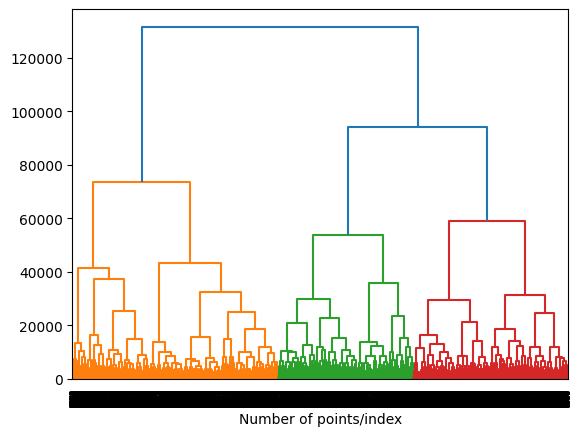

In [72]:
acl = hierarchical_clustering(testX, linkage='single')
print("Single link")
dendrogram(acl) 


Complete link


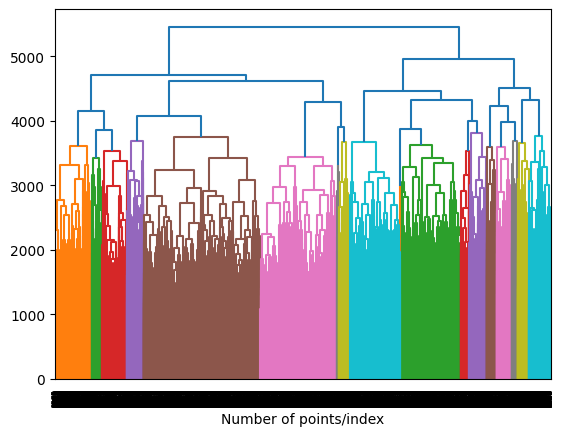

In [78]:
acl = hierarchical_clustering(testX, linkage='complete')
print("Complete link")
dendrogram(acl) 

 **Question**: Explain the procedure to find the optimal number of clusters using dendogram

 Answer: </br>
By drawing a horizontal line that intersects the largest vertical lines, and counting how many lines are intersected gives us our best number of clusters.

In this case, we can draw a line at about 45000, which intersects 6 lines. Thus, our optimal number of clusters is 6.
This appears to be the case for complete linkages as well


 **Question:** Mention the differences observed using single and complete linkage:

Answer: </br>
In single linkage, large clusters are formed very quickly, while complete linkage forms many intermediate sized clusters that are then combined later on.

 ## Part3: Image Compression

[[233 232  62]
 [230 229  61]
 [226 225  59]
 ...
 [ 27  31  14]
 [ 26  30  15]
 [ 26  30  15]]


[]

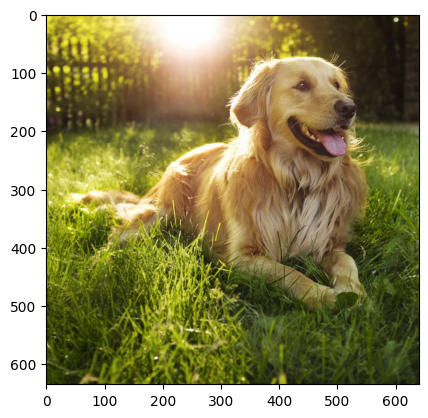

In [2]:
import cv2

img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Reshape it to be 2-dimension
img_size = img.shape
X = img.reshape(img_size[0] * img_size[1], img_size[2])

print(X)
plt.imshow(img)
plt.plot()




In [3]:
def compressImg(img, numClusters=10, init="k-means++", retCL=False):
    X = img.reshape(img.shape[0] * img.shape[1], img.shape[2])
    kmeans = KMeans(n_clusters=numClusters, init=init, n_init=10).fit(X)

    colors = np.uint8(kmeans.cluster_centers_)
    labels = np.array(kmeans.labels_, dtype=np.short).reshape(img.shape[0], img.shape[1])

    cImg = colors[labels.reshape(-1)].reshape(labels.shape[0], labels.shape[1], -1)

    if retCL:
        return [cImg, colors, labels]

    return cImg


In [30]:
sClusters = 32
numClusters = 16
exClusters = 8

sImg, sc, sl = compressImg(img, numClusters=sClusters, retCL=True)
cImg, c, l = compressImg(img, numClusters=numClusters, retCL=True)
exImg, exc, exl = compressImg(img, numClusters=exClusters, retCL=True)

Original image, 9753600 bits
Less compressed, 2032384 bits
Compressed image, 1625984 bits
More compressed, 1219584 bits

Bits saved with 32 colors: 7721216 bits
Percent reduction: 79.16%

Bits saved with 16 colors: 8127616 bits
Percent reduction: 83.33%

Bits saved with 8 colors: 8534016 bits
Percent reduction: 87.50%


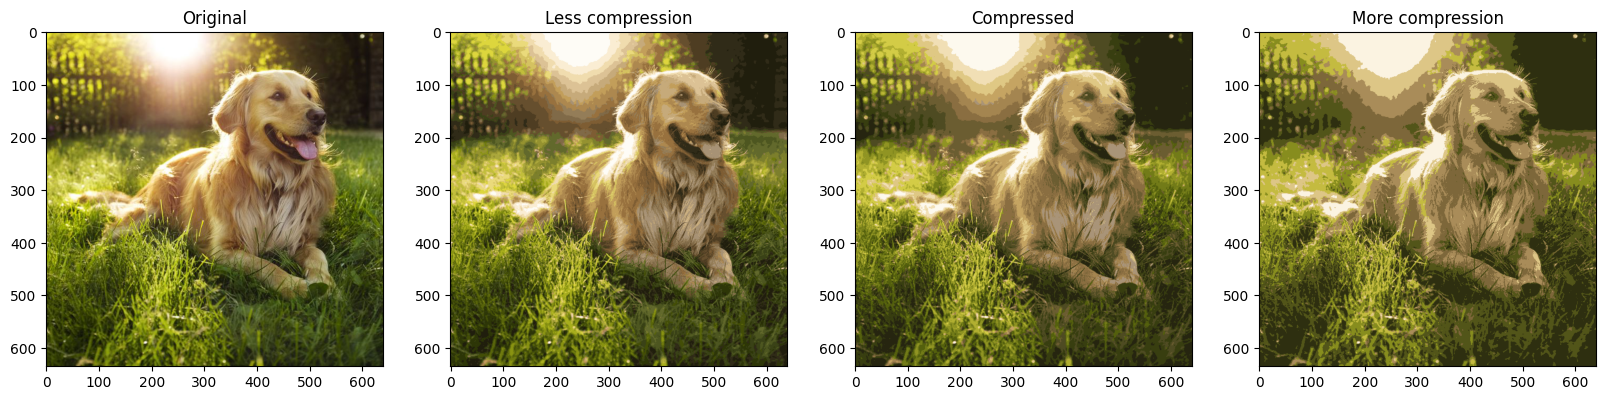

In [32]:
%matplotlib inline

# numClusters bits can ideally be expressed in 16 bits with a short type, but this can theoretically be reduced to just 4 bits
# 32 colors need 5 bits, 8 colors only need 3 bits to be expresed

fig = plt.figure(figsize=(20,50))

originalSize = (3*img.shape[0]*img.shape[1]*8)
print("Original image, %d bits" % originalSize)

fig.add_subplot(1,4,1)
plt.title("Original")
plt.imshow(img)

sSize = (img.shape[0]*img.shape[1]*5 + 24*numClusters)
print("Less compressed, %d bits" % sSize)

fig.add_subplot(1,4,2)
plt.title("Less compression")
plt.imshow(sImg)

cSize = (img.shape[0]*img.shape[1]*4 + 24*numClusters)
print("Compressed image, %d bits" % cSize)

fig.add_subplot(1,4,3)
plt.title("Compressed")
plt.imshow(cImg)

exSize = (img.shape[0]*img.shape[1]*3 + 24*numClusters)
print("More compressed, %d bits" % exSize)

fig.add_subplot(1,4,4)
plt.title("More compression")
plt.imshow(exImg)


print()

print("Bits saved with 32 colors: %d bits" % (originalSize - sSize))
print("Percent reduction: %.2f%%" % (100*float(originalSize - sSize)/originalSize))

print()

print("Bits saved with 16 colors: %d bits" % (originalSize - cSize))
print("Percent reduction: %.2f%%" % (100*float(originalSize - cSize)/originalSize))

print()

print("Bits saved with 8 colors: %d bits" % (originalSize - exSize))
print("Percent reduction: %.2f%%" % (100*float(originalSize - exSize)/originalSize))

# fig.show()

